<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/ML_Testing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL UNTUK MEMPREDIKSI TOTAL PRODUKSI BERAS PADA WILAYAH TERTENTU

1.   Input : Suhu, kelembaban, curah hujan, lama penyinaran, luas lahan
2.   Output : Total produksi beras
3.   Scope Input dan Output :  Data diambail rata rata dalam tiap bulan pada 3 kabupaten (Lamongan, Banyuwangi, Tuban) di Jawa Timur 
4.   Sumber : https://dataonline.bmkg.go.id/data_iklim,  https://jatim.bps.go.id/publication/2020/12/28/53ad74b4263660ce4adf0ed3/analisis-data-beras-provinsi-jawa-timur-2018-2020.html

In [26]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Upload file dataset dari lokal
from google.colab import files
uploaded = files.upload()

Saving model.h5 to model.h5


In [5]:
# Load the model
model = tf.keras.models.load_model('model.h5')

In [17]:
# Input dari data pada database
input = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input.append([])
    input[counter].append(float(row[0]))
    input[counter].append(float(row[1]))
    input[counter].append(float(row[2]))
    input[counter].append(float(row[5]))
    input[counter].append(float(row[6]))
    input[counter].append(float(row[7]))
    input[counter].append(float(row[8]))
    input[counter].append(float(row[9]))
    input[counter].append(float(row[10]))
    input[counter].append(float(row[11]))
    input[counter].append(float(row[12]))
    input[counter].append(float(row[13]))
    counter+=1

input = np.array(input)

print(input)

[[1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0880e+01 3.4400e+00 1.3850e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.7450e+01 5.4100e+00 2.3129e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.6030e+01 5.2000e+00 3.0824e+04]
 ...
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.9500e+00 6.2500e+00 9.3130e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 8.9200e+00 6.6100e+00 1.7520e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.3010e+01 3.0700e+00 1.4660e+03]]


In [18]:
# Output dari data pada database
output = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    output.append([])
    output[counter].append(float(row[14]))
    counter+=1

output = np.array(output)

print(output)

[[  5209.48]
 [ 86975.4 ]
 [115862.16]
 [ 30774.59]
 [ 43242.82]
 [ 61068.1 ]
 [ 28292.76]
 [ 52681.05]
 [ 76667.7 ]
 [  8336.23]
 [  2551.31]
 [  3091.78]
 [ 15928.9 ]
 [  9757.82]
 [ 45069.81]
 [ 45451.84]
 [ 26473.66]
 [ 11069.01]
 [ 22321.44]
 [ 32151.33]
 [ 28035.94]
 [ 21473.32]
 [ 17215.7 ]
 [ 20620.07]
 [  8919.26]
 [ 17647.85]
 [ 88166.98]
 [ 53368.58]
 [  5963.89]
 [ 22567.4 ]
 [ 26090.58]
 [ 13280.79]
 [ 30596.29]
 [ 38858.77]
 [ 10700.88]
 [  7964.59]
 [ 10558.09]
 [ 31180.56]
 [101956.71]
 [ 74319.36]
 [ 17322.18]
 [ 69561.05]
 [ 41828.82]
 [ 53880.42]
 [ 58044.09]
 [ 16713.73]
 [  5373.29]
 [  1637.76]
 [ 24683.18]
 [ 10217.73]
 [ 24777.63]
 [ 51528.42]
 [ 29243.91]
 [ 10147.88]
 [  9540.8 ]
 [ 20361.59]
 [ 27265.68]
 [ 27366.8 ]
 [ 12511.74]
 [  8128.77]
 [ 11590.42]
 [ 18216.62]
 [ 41044.27]
 [ 85570.82]
 [ 19437.87]
 [ 10804.02]
 [ 21359.23]
 [ 15103.27]
 [ 13768.52]
 [ 43813.82]
 [ 12969.53]
 [  4995.64]
 [  1194.46]
 [  9610.85]
 [ 96343.8 ]
 [103583.39]
 [ 25728.34]

In [19]:
# Bagi data untuk training, validasi dan testing
split_scaled = 72

input_scaled = input[:split_scaled]
input_test = input[split_scaled:]
output_scaled = output[:split_scaled]
output_test = output[split_scaled:]

print(len(input_scaled))
print(len(input_test))

72
36


In [20]:
# Normalisasi data
split_valid = 36

scaler_input = MinMaxScaler()
scaler_input.fit(input_scaled)
input_train_scaled = scaler_input.transform(input_scaled[:split_valid])
input_valid_scaled = scaler_input.transform(input_scaled[split_valid:])
input_test_scaled = scaler_input.transform(input_test)

print(input_train_scaled)
print(input_valid_scaled)
print(input_test_scaled)

scaler_output = MinMaxScaler()
scaler_output.fit(output_scaled)
output_train_scaled = scaler_output.transform(output_scaled[:split_valid])
output_valid_scaled = scaler_output.transform(output_scaled[split_valid:])
output_test_scaled = scaler_output.transform(output_test)

print(output_train_scaled)
print(output_valid_scaled)

[[1.         0.         0.         0.31746032 0.64912281 0.44104803
  0.70833333 0.75862069 0.72981651 0.49342404 0.07771261 0.03202578]
 [1.         0.         0.         0.26984127 0.56140351 0.33624454
  0.66666667 0.82758621 0.79678899 0.79138322 0.36656891 0.7469832 ]
 [1.         0.         0.         0.46031746 0.61403509 0.430131
  0.79166667 0.79310345 0.80688073 0.72698413 0.33577713 1.        ]
 [1.         0.         0.         0.49206349 0.70175439 0.71834061
  0.54166667 0.62068966 0.51834862 0.47029478 0.76686217 0.25558149]
 [1.         0.         0.         0.6031746  0.8245614  0.67248908
  0.25       0.51724138 0.40275229 0.         0.76246334 0.42093841]
 [1.         0.         0.         0.33333333 0.71929825 0.48908297
  0.45833333 0.5862069  0.47110092 0.20907029 0.77419355 0.60086147]
 [1.         0.         0.         0.34920635 0.40350877 0.21615721
  0.33333333 0.48275862 0.39266055 0.         0.89882698 0.27096965]
 [1.         0.         0.         0.158730

In [22]:
# Input dari data testing
testing_data=[]
counter=0
number_of_testing=[]
number=1

for x in input_test_scaled:
  testing_data.append([])
  for y in x:
    testing_data[counter].append(y)
  counter+=1
  number_of_testing.append(number)
  number+=1

total_of_testing=len(input_test_scaled)
print(total_of_testing)
print(number_of_testing)

36
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [23]:
# Output dari data validasi
output_test_transform=[]
counter=0

for i in output_test_scaled:
  output_test_transform.append([])
  for x in i:
    output_test_transform[counter].append([])
    output_test_transform[counter][0].append(i[0])
  counter+=1

print(output_test_transform)

[[[-0.0038809571335021234]], [[0.06980198626563151]], [[0.8291226743147699]], [[0.8925030904080039]], [[0.21090572592195714]], [[0.3129455702984651]], [[0.4204705824674938]], [[0.7653249218205567]], [[0.47984598737222517]], [[0.23605271728282226]], [[0.010825095163555247]], [[-0.0018817345505863902]], [[0.12881030672956043]], [[0.048247309681644195]], [[0.04350025038433119]], [[0.3091092621191269]], [[0.4421044015114109]], [[0.18983028144599576]], [[0.062279600505671294]], [[0.10840380864333717]], [[0.24422198759634542]], [[0.3756634309306943]], [[0.1176319595462966]], [[0.08221894796558354]], [[0.07315669856878217]], [[0.15744709536666424]], [[0.27697260830435527]], [[0.5711679816221403]], [[0.3619955105914323]], [[0.09673554862183562]], [[0.12422372102633061]], [[0.16139126141174742]], [[0.19128513697598762]], [[0.3392485318373307]], [[0.05219191346157213]], [[0.04133757761038798]]]


In [24]:
# Prediksi data testing
output_prediksi=[]
output_testing=[]

for i in range(total_of_testing):
  input_prediksi=[]
  input_prediksi.append([])
  for y in testing_data[i]:
    input_prediksi[0].append(y)
  prediksi = model.predict(input_prediksi)
  prediksi = scaler_output.inverse_transform(prediksi)
  output_prediksi.append(prediksi[0][0])
  testing = scaler_output.inverse_transform(output_test_transform[i])
  output_testing.append(testing[0][0])

print(output_prediksi)
print(output_testing)

[2454.9475, 20603.582, 94427.92, 100662.25, 41549.07, 39206.258, 50536.324, 90546.89, 46484.066, 22485.174, 1651.3634, 13756.509, 18837.604, 7289.0386, 4131.1143, 36197.035, 47126.66, 19478.057, 9214.767, 13011.583, 28535.69, 41700.2, 13640.045, 8919.547, 3563.0273, 17984.553, 34959.223, 65229.312, 42369.105, 12308.805, 15508.457, 23203.996, 21245.203, 26233.717, 7341.0327, 6583.506]
[1194.46, 9610.85, 96343.8, 103583.39, 25728.34, 37383.78, 49665.76, 89056.54, 56447.88, 28600.74, 2874.25, 1422.82, 16351.04, 7148.78, 6606.55, 36945.58, 52136.87, 23321.01, 8751.61, 14020.12, 29533.87, 44547.69, 15074.2, 11029.17, 9994.04, 19622.06, 33274.79, 66879.08, 42986.48, 12687.32, 15827.139999999998, 20072.58, 23487.19, 40388.22, 7599.349999999999, 6359.52]


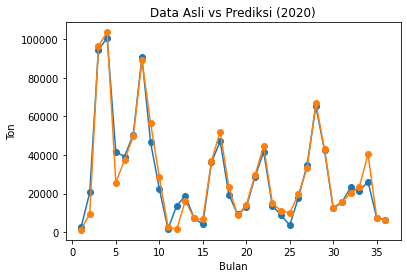

In [30]:
# Grafik garis dari total produksi beras
plt.plot(number_of_testing,output_prediksi,marker='o')
plt.plot(number_of_testing,output_testing,marker='o')
plt.title('Data Asli vs Prediksi (2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()